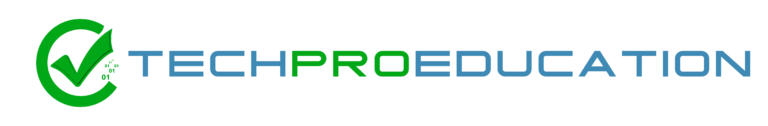

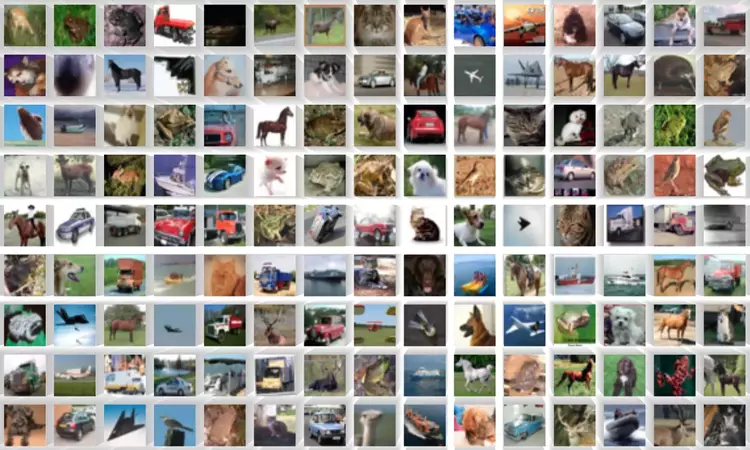

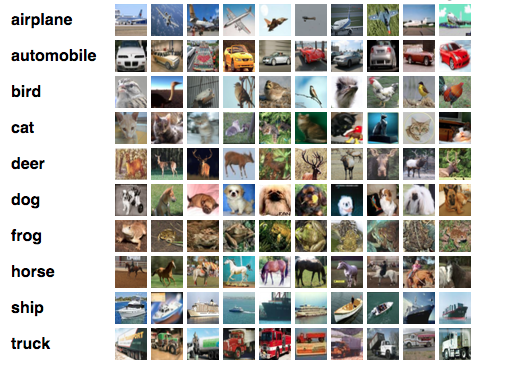

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

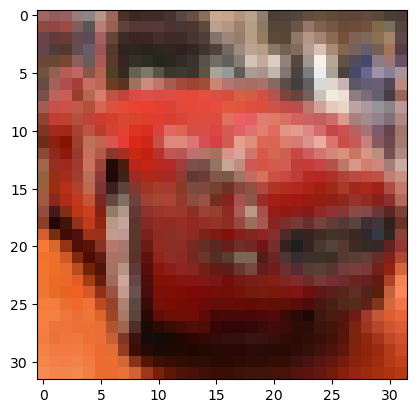

In [7]:
plt.imshow(X_train[5])

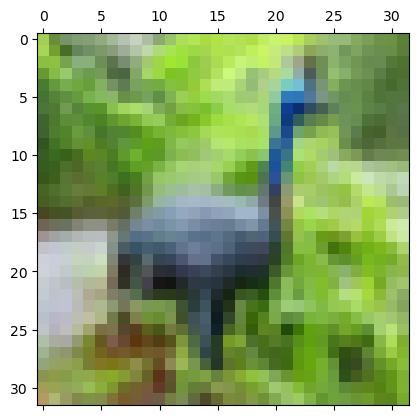

In [8]:
plt.matshow(X_train[6])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

21067

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([18074, 17645, 14023, 34139, 28185, 36136, 28837, 16904,  7677,
       33450,  3068, 45690, 34935,  2308,  5217, 49484, 23558])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([ 7444, 44475, 11955,  2899, 33689, 30950,  6241, 47118, 31759,
        5324, 13955, 48051, 41022, 24660, 14125, 47152, 21650])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[191, 193, 190],
        [189, 191, 188],
        [190, 192, 189],
        ...,
        [172, 167, 165],
        [165, 160, 159],
        [161, 157, 158]],

       [[192, 193, 190],
        [189, 189, 187],
        [190, 191, 188],
        ...,
        [172, 166, 163],
        [165, 158, 158],
        [164, 157, 159]],

       [[193, 193, 189],
        [190, 190, 186],
        [193, 193, 189],
        ...,
        [174, 166, 165],
        [169, 160, 161],
        [167, 158, 161]],

       ...,

       [[199, 208, 214],
        [200, 206, 213],
        [199, 204, 211],
        ...,
        [156, 145, 149],
        [164, 160, 168],
        [166, 163, 171]],

       [[193, 203, 209],
        [190, 198, 206],
        [191, 198, 205],
        ...,
        [172, 164, 169],
        [169, 166, 173],
        [167, 164, 171]],

       [[190, 201, 208],
        [189, 198, 206],
        [191, 199, 207],
        ...,
        [174, 172, 177],
        [170, 172, 177],
        [167, 167, 174]]

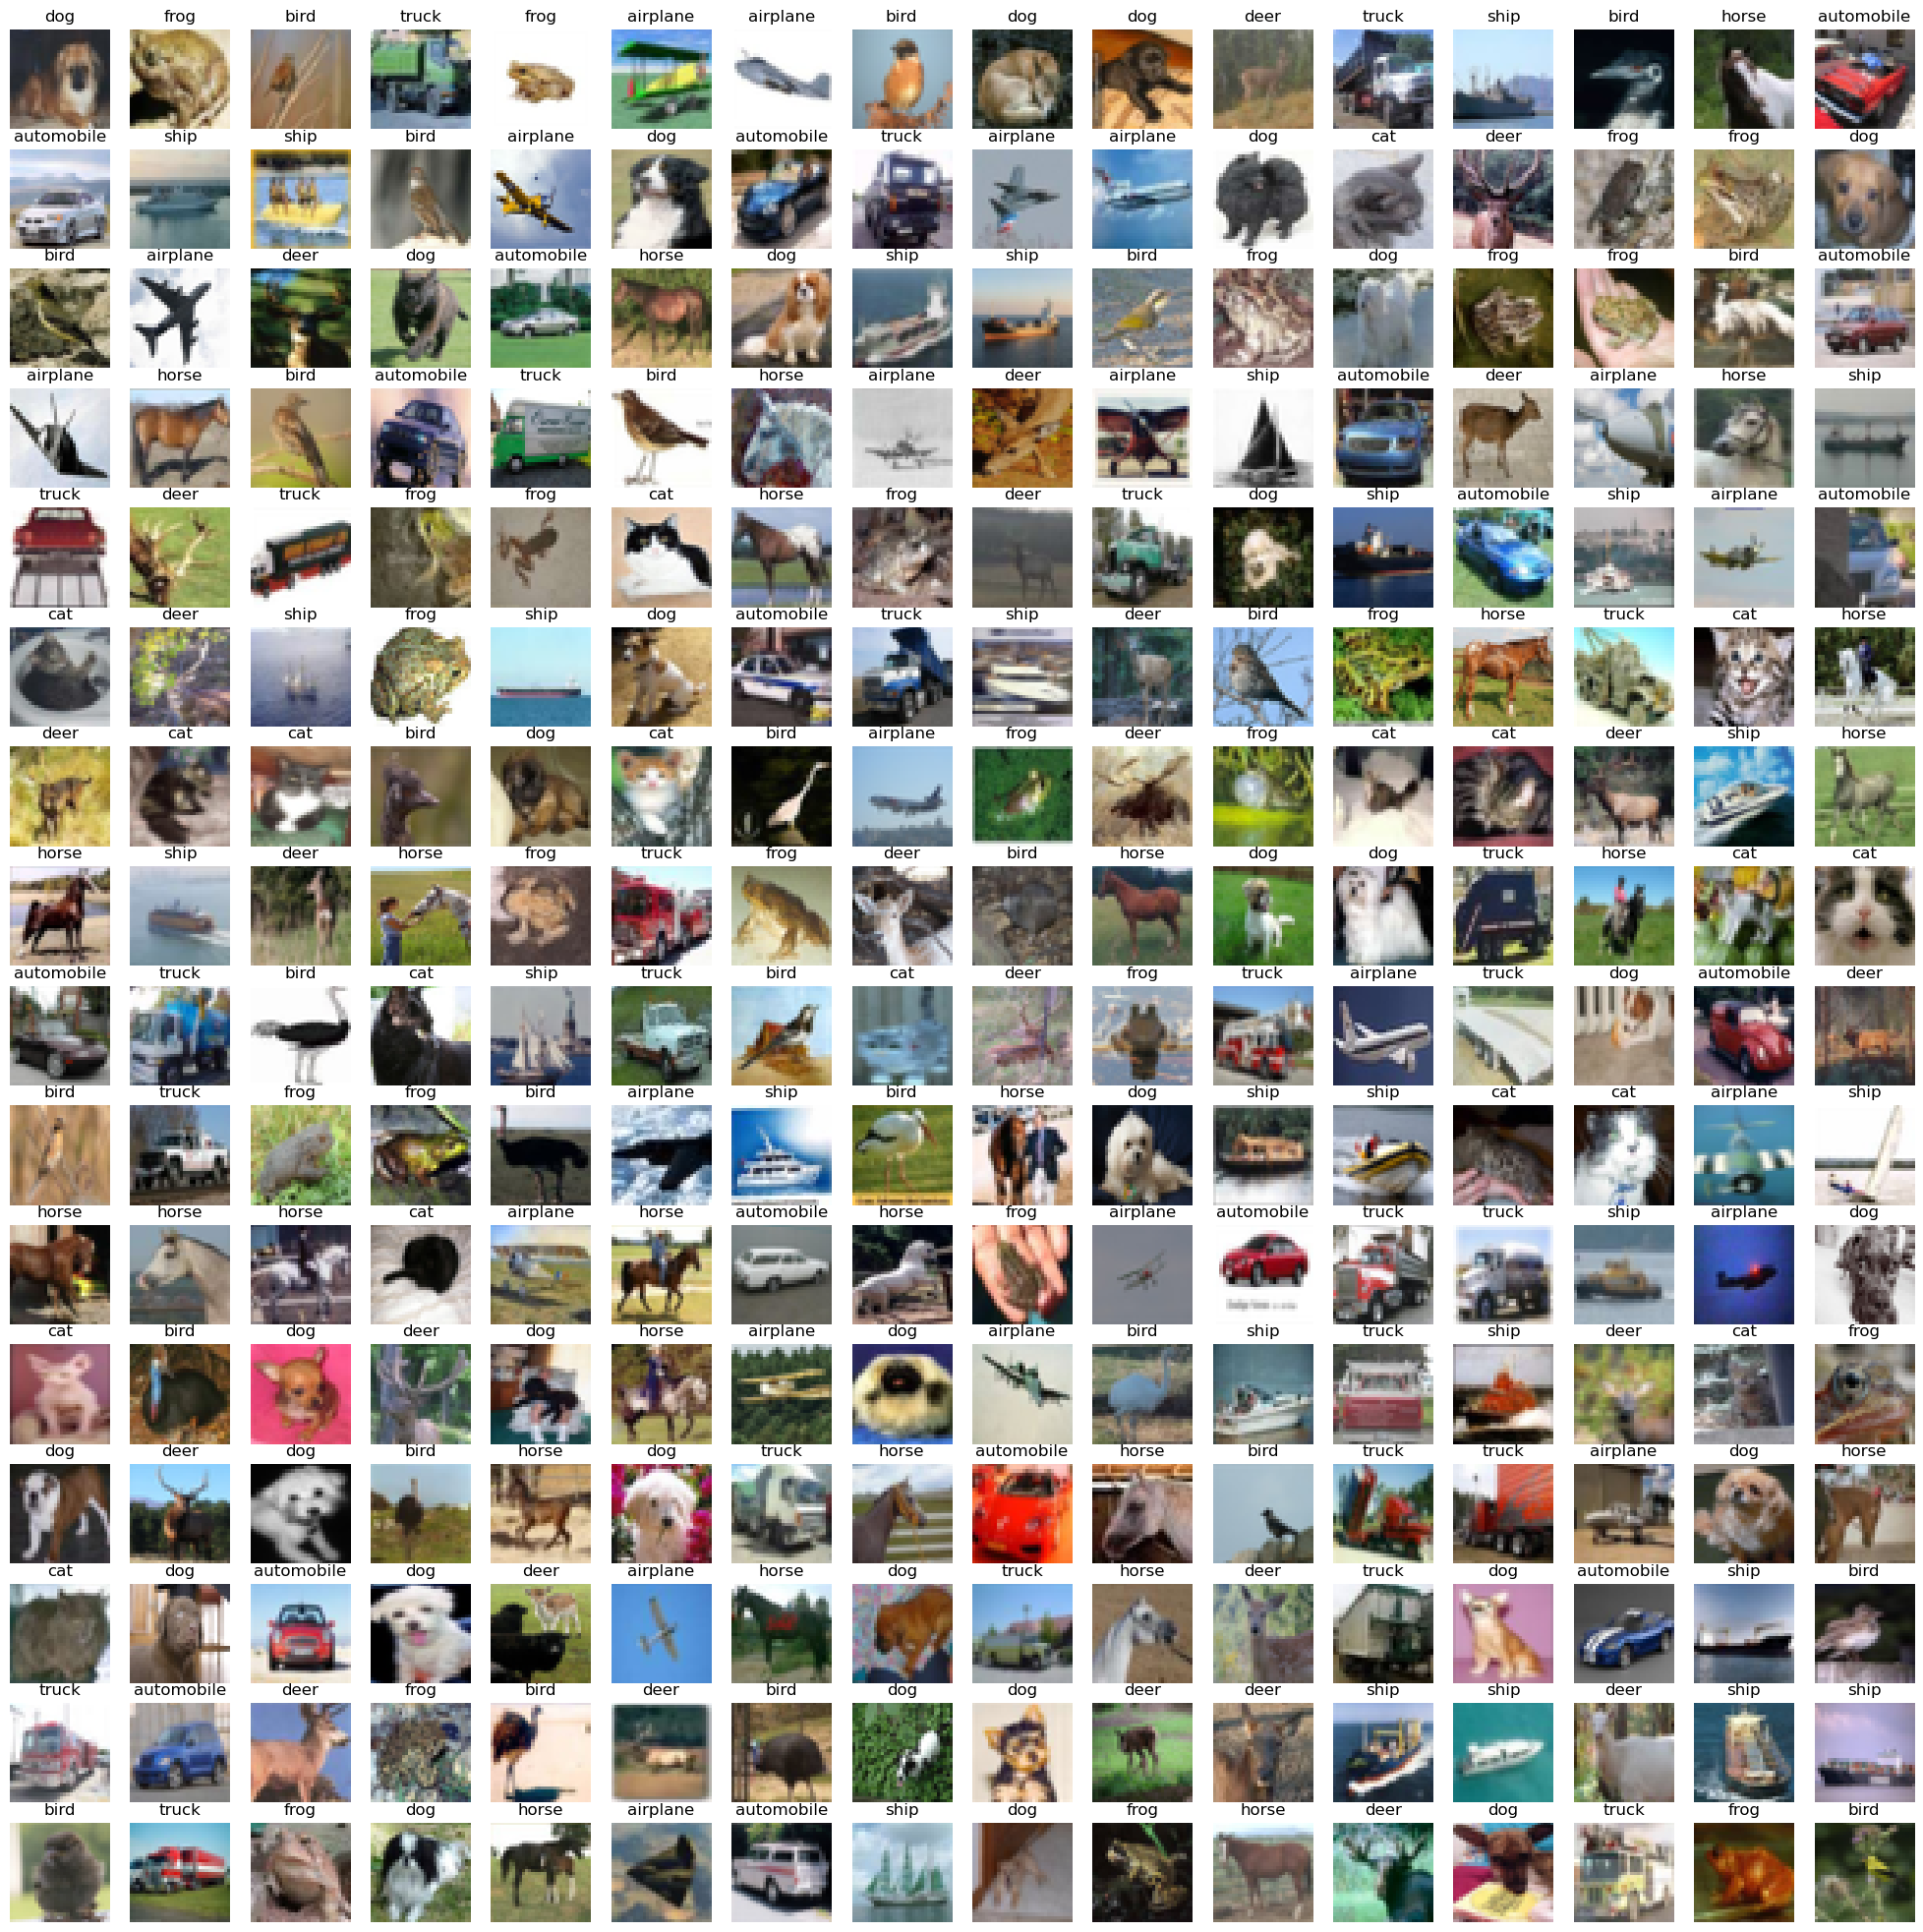

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

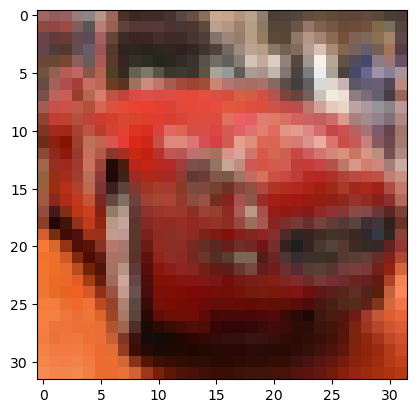

In [26]:
plt.imshow(X_train[5])

In [27]:
X_train.shape, X_test.shape    # rgb = 3

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train      # olması gereken format [0,0,0,0,0,0,1,0,0,0] = 6 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

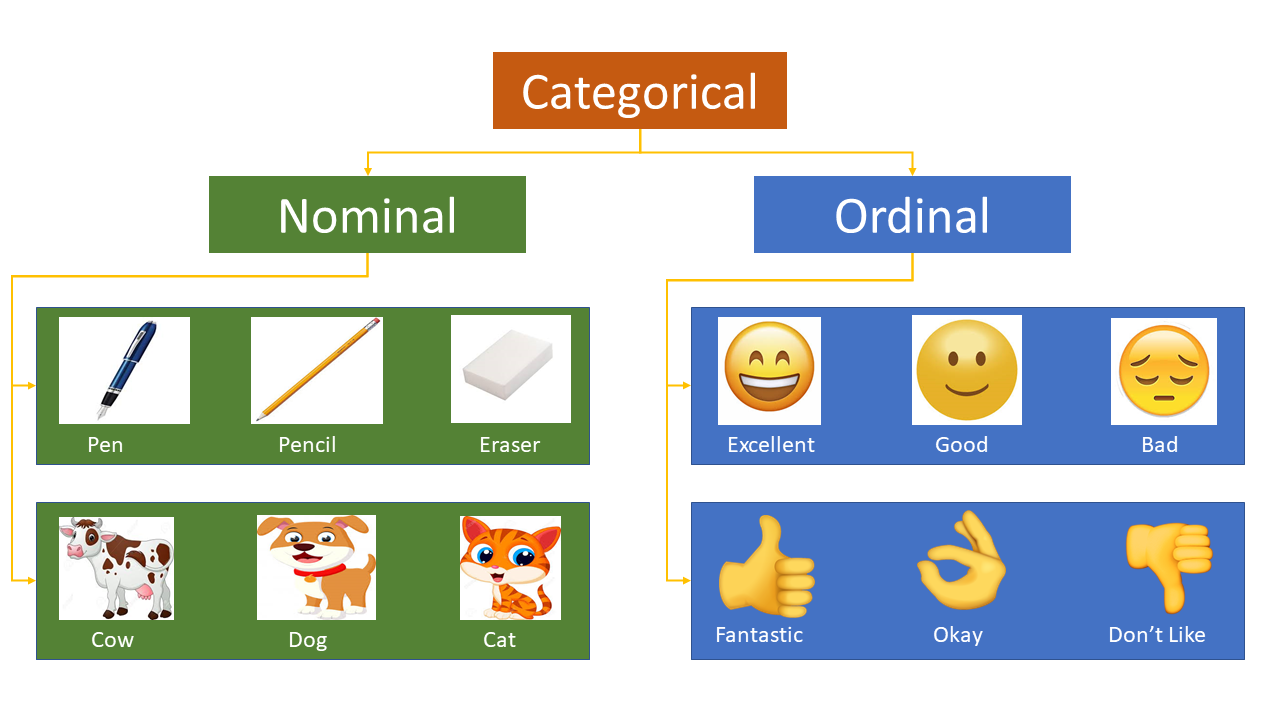

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3912 - loss: 1.6666 - val_accuracy: 0.6298 - val_loss: 1.0579
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6593 - loss: 0.9686 - val_accuracy: 0.6787 - val_loss: 0.9121
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7249 - loss: 0.7796 - val_accuracy: 0.7107 - val_loss: 0.8323
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7684 - loss: 0.6580 - val_accuracy: 0.7222 - val_loss: 0.8206
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8014 - loss: 0.5625 - val_accuracy: 0.7160 - val_loss: 0.8492
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8301 - loss: 0.4792 - val_accuracy: 0.7270 - val_loss: 0.8358
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8535 - loss: 0.4111 - val_accuracy: 0.7288 - val_loss: 0.8493
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8733 -

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
model.history.history

{'accuracy': [0.500540018081665,
  0.6730599999427795,
  0.7288200259208679,
  0.766260027885437,
  0.795960009098053,
  0.8227599859237671,
  0.8444200158119202,
  0.8648399710655212,
  0.8828999996185303],
 'loss': [1.3837486505508423,
  0.9293363690376282,
  0.7725573182106018,
  0.6643235683441162,
  0.5764088034629822,
  0.5024911761283875,
  0.4349122643470764,
  0.37767016887664795,
  0.3265908360481262],
 'val_accuracy': [0.629800021648407,
  0.6786999702453613,
  0.7106999754905701,
  0.7221999764442444,
  0.7160000205039978,
  0.7269999980926514,
  0.7287999987602234,
  0.7260000109672546,
  0.7199000120162964],
 'val_loss': [1.0578597784042358,
  0.9120567440986633,
  0.8322559595108032,
  0.8206151127815247,
  0.8491807579994202,
  0.8357923030853271,
  0.8492847084999084,
  0.94859778881073,
  1.0061389207839966]}

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.50054,1.383749,0.6298,1.057860
1,0.67306,0.929336,0.6787,0.912057
2,0.72882,0.772557,0.7107,0.832256
3,0.76626,0.664324,0.7222,0.820615
4,0.79596,0.576409,0.7160,0.849181


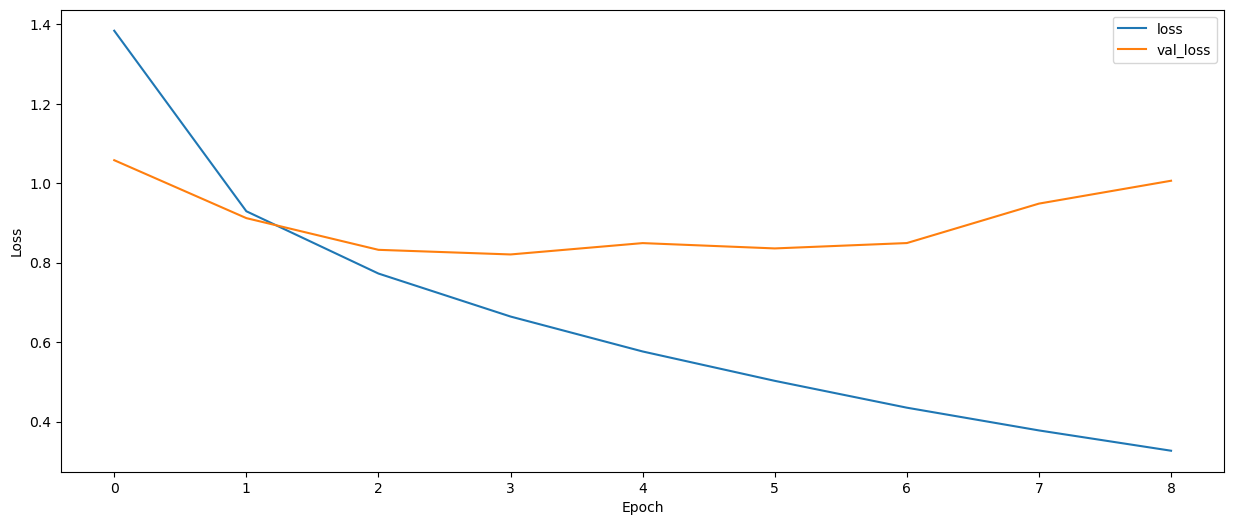

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

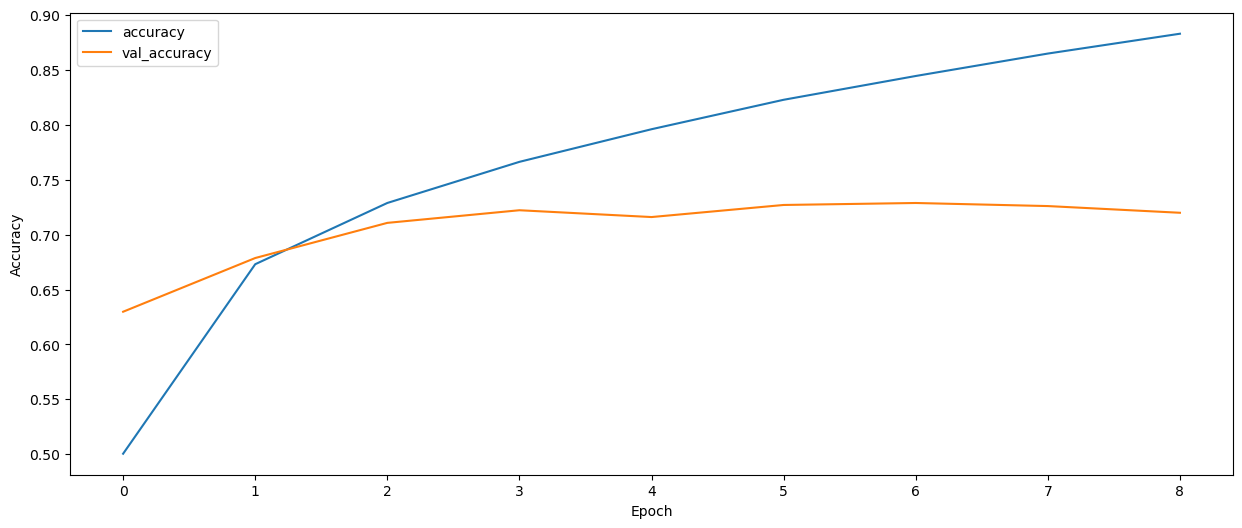

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7244 - loss: 0.9752
[1.0061389207839966, 0.7199000120162964]


In [43]:
preds = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [44]:
predictions = np.argmax(preds, axis=1)

In [45]:
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.86      0.84      0.85      1000
           2       0.57      0.58      0.58      1000
           3       0.58      0.48      0.52      1000
           4       0.63      0.75      0.68      1000
           5       0.67      0.60      0.64      1000
           6       0.81      0.75      0.78      1000
           7       0.76      0.79      0.77      1000
           8       0.81      0.83      0.82      1000
           9       0.78      0.84      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[747  11  52  18  26   8   2  18  70  48]
 [ 21 836   8   4   4   2   2   5  22  96]
 [ 74   2 582  53 117  50  58  34  17  13]
 [ 54  15  83 477  90 151  48  35  27  20]
 [ 14   1  73  40 746  22  31  58  11   4]
 [ 25   4  74 133  55 602  21  64  12  10]
 [ 10   4  73  59  65  15 749   6  12   7]
 [ 14   2  43  28  73  37   6 785   4   8]
 [ 53  31  24   7   7   6   2   7 835  28]
 [ 36  61   7   4   3   2   2  21  24 840]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0061389207839966
Test accuracy: 0.7199000120162964


In [50]:
my_image = X_test[44]

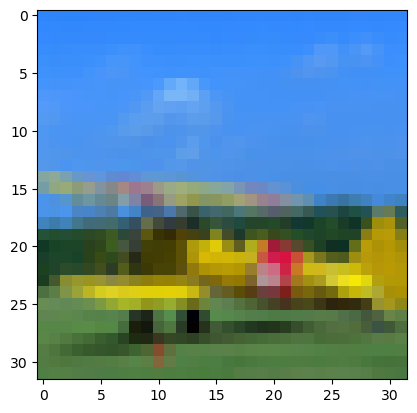

In [51]:
plt.imshow(my_image)

In [52]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [53]:
image_prediction

array([[9.1660964e-01, 7.2335283e-06, 6.2624860e-04, 2.3394371e-06,
        9.1821369e-04, 2.8209767e-08, 9.2650936e-08, 2.1383699e-02,
        1.0348061e-07, 6.0452405e-02]], dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([0], dtype=int64)

In [57]:
classes[int(result)]

'airplane'

In [58]:
#model.save("cnn-2.h5")

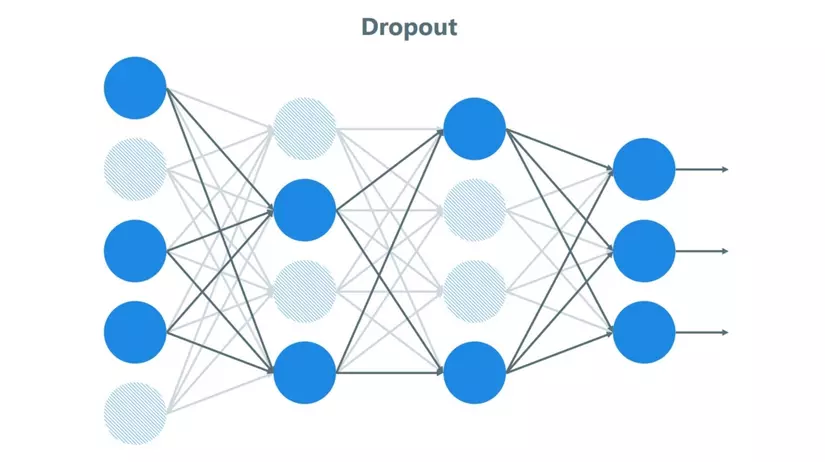

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [60]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.4))

model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.4))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(64, activation='relu'))

model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [61]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3322 - loss: 1.8063 - val_accuracy: 0.5690 - val_loss: 1.2147
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5676 - loss: 1.2045 - val_accuracy: 0.6565 - val_loss: 0.9880
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6366 - loss: 1.0262 - val_accuracy: 0.6758 - val_loss: 0.9131
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6613 - loss: 0.9522 - val_accuracy: 0.6676 - val_loss: 0.9454
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6895 - loss: 0.8742 - val_accuracy: 0.7189 - val_loss: 0.8208
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7120 - loss: 0.8179 - val_accuracy: 0.7256 - val_loss: 0.7838
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7224 - loss: 0.7852 - val_accuracy: 0.7352 - val_loss: 0.7652
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 

In [63]:
score = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6930548548698425
Test accuracy: 0.7591000199317932


In [64]:
preds = model_2.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1000
           1       0.88      0.87      0.88      1000
           2       0.70      0.60      0.65      1000
           3       0.60      0.51      0.55      1000
           4       0.73      0.74      0.74      1000
           5       0.62      0.69      0.65      1000
           6       0.82      0.84      0.83      1000
           7       0.86      0.76      0.81      1000
           8       0.80      0.90      0.85      1000
           9       0.83      0.86      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [66]:
print(confusion_matrix(y_test, predictions))

[[823  11  22   7  10   5   7  10  82  23]
 [ 18 870   0   5   1   2   3   0  33  68]
 [ 96   6 598  51  85  72  47  19  14  12]
 [ 35  15  67 509  59 199  58  17  20  21]
 [ 29   3  49  45 744  37  40  37  12   4]
 [ 14   6  36 137  41 689  18  29  15  15]
 [ 12   2  38  34  28  29 838   3  13   3]
 [ 17   4  32  39  49  74   3 758   4  20]
 [ 43  17   5   4   3   5   2   3 904  14]
 [ 37  52   3  13   0   1   2   4  30 858]]


<Axes: >

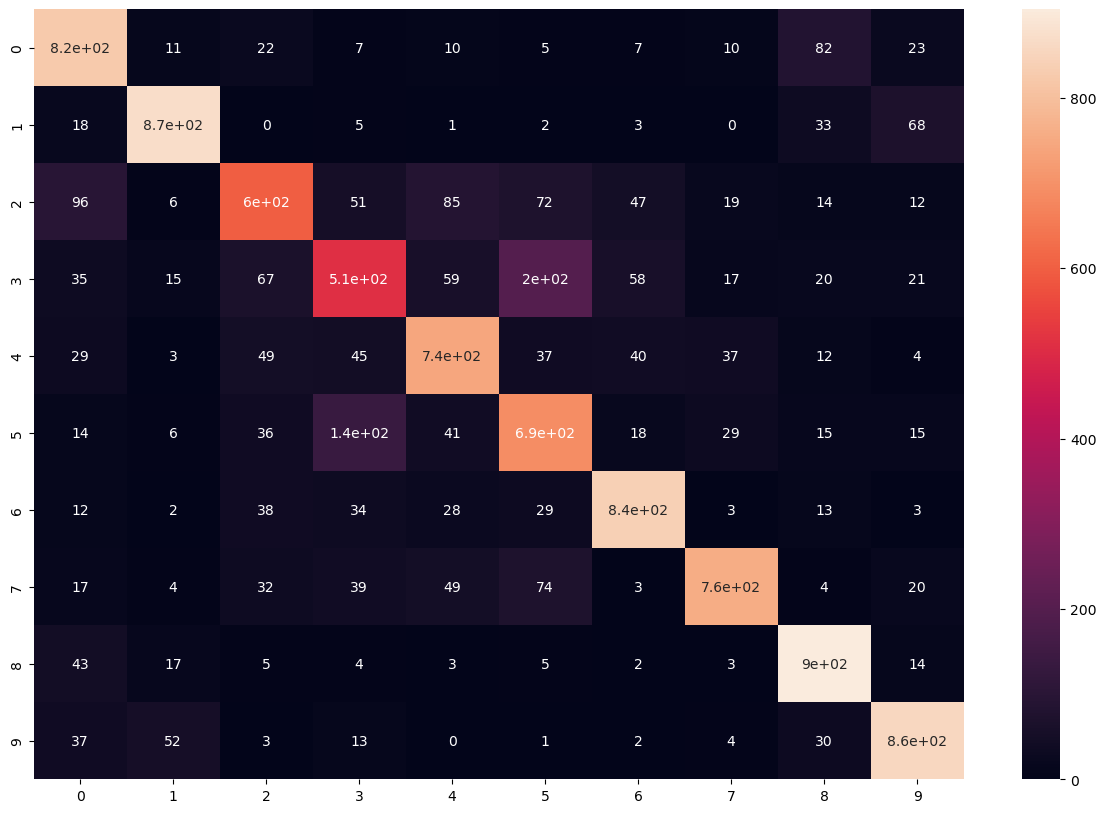

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

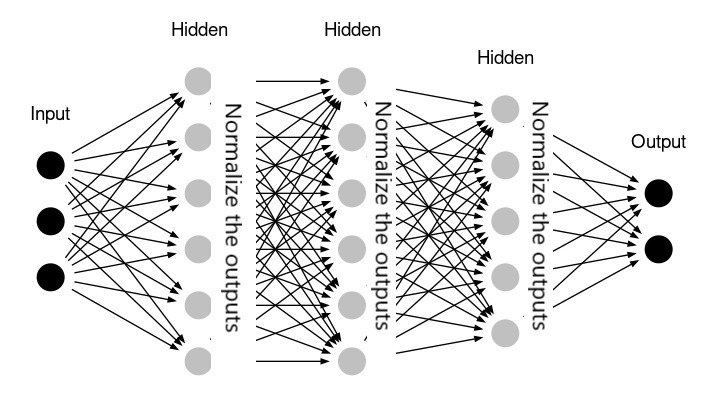

In [68]:
from tensorflow.keras.layers import BatchNormalization

In [69]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [83]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_3.add(BatchNormalization())
#model_3.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

#model_3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(Conv2D(128, (3,3), activation='relu'))
model_3.add(BatchNormalization())
#model_3.add(MaxPool2D(pool_size=(2,2)))
#model_3.add(Dropout(0.3))

#model_3.add(Conv2D(256, (3,3), padding='same', activation='relu'))
#model_3.add(BatchNormalization())
#model_3.add(Conv2D(256, (3,3), padding='same', activation='relu'))
#model_3.add(BatchNormalization())
#model_3.add(MaxPool2D(pool_size=(2,2)))
#model_3.add(Dropout(0.3))


model_3.add(Flatten())

model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))

model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model_3.summary()

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,346,954 (5.14 MB)

 Trainable params: 1,345,610 (5.13 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [84]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.3719 - loss: 1.8620 - val_accuracy: 0.5884 - val_loss: 1.1450
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6021 - loss: 1.1289 - val_accuracy: 0.6107 - val_loss: 1.1096
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6765 - loss: 0.9315 - val_accuracy: 0.6984 - val_loss: 0.8731
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7144 - loss: 0.8275 - val_accuracy: 0.7101 - val_loss: 0.8147
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7380 - loss: 0.7508 - val_accuracy: 0.7070 - val_loss: 0.8768


In [86]:
score = model_3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8767772316932678
Test accuracy: 0.7070000171661377


In [87]:
preds = model_3.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [88]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1000
           1       0.90      0.85      0.87      1000
           2       0.66      0.58      0.62      1000
           3       0.63      0.42      0.50      1000
           4       0.57      0.76      0.65      1000
           5       0.75      0.49      0.60      1000
           6       0.91      0.56      0.69      1000
           7       0.69      0.83      0.76      1000
           8       0.72      0.88      0.79      1000
           9       0.66      0.89      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



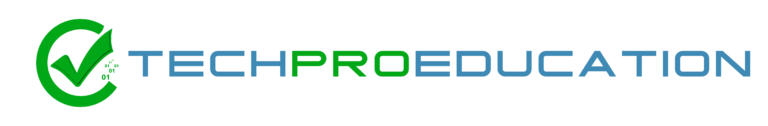